In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from openpyxl import Workbook
from openpyxl.utils.dataframe import dataframe_to_rows
from openpyxl.chart import BarChart, Reference

In [5]:
data = pd.read_csv(r"E:\employees_final.csv")

In [5]:
print(data)

       employee_id         department     region  education gender  \
0             8724         Technology  region_26  Bachelors      m   
1            74430                 HR   region_4  Bachelors      f   
2            72255  Sales & Marketing  region_13  Bachelors      m   
3            38562        Procurement   region_2  Bachelors      f   
4            64486            Finance  region_29  Bachelors      m   
...            ...                ...        ...        ...    ...   
16641        70260         Operations   region_2  Bachelors      m   
16642        12373         Technology   region_2  Bachelors      m   
16643        12670         Technology  region_27  Bachelors      f   
16644        68188                 HR   region_7  Bachelors      f   
16645        11927         Operations  region_17  Bachelors      f   

      recruitment_channel  no_of_trainings  age  previous_year_rating  \
0                sourcing                1   24                   3.0   
1            

In [11]:
data.isnull().sum()

employee_id                0
department                 0
region                     0
education                  0
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating     592
length_of_service          0
KPIs_met_more_than_80      0
awards_won                 0
avg_training_score         0
dtype: int64

In [13]:
print(data['previous_year_rating'].dtype)


float64


In [15]:
data['previous_year_rating'] = data['previous_year_rating'].fillna(data['previous_year_rating'].median())


In [17]:
data.isnull().sum()

employee_id              0
department               0
region                   0
education                0
gender                   0
recruitment_channel      0
no_of_trainings          0
age                      0
previous_year_rating     0
length_of_service        0
KPIs_met_more_than_80    0
awards_won               0
avg_training_score       0
dtype: int64

In [19]:
def generate_summary(data):
    """Generate descriptive and department-wise summaries."""
    summary_stats = data.describe().transpose()
    department_summary = data.groupby('department').agg({
        'employee_id': 'count',
        'avg_training_score': 'mean',
        'KPIs_met_more_than_80': 'sum',
        'awards_won': 'sum',
        'length_of_service': 'mean'
    }).rename(columns={
        'employee_id': 'Employee Count',
        'avg_training_score': 'Avg Training Score',
        'KPIs_met_more_than_80': 'KPIs Met >80%',
        'awards_won': 'Total Awards',
        'length_of_service': 'Avg Length of Service'
    })
    return summary_stats, department_summary

In [21]:
def create_visualizations(department_summary, output_path):
    """Create and save visualizations."""
    plt.figure(figsize=(12, 6))
    sns.barplot(data=department_summary.reset_index(), x='department', y='Avg Training Score', palette='viridis')
    plt.title('Average Training Score by Department')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(output_path)

In [23]:
def generate_excel_report(summary_stats, department_summary, output_path):
    """Generate an automated Excel report."""
    wb = Workbook()

    # Add Summary Statistics Sheet
    ws_summary = wb.active
    ws_summary.title = 'Summary Stats'
    for r in dataframe_to_rows(summary_stats, index=True, header=True):
        ws_summary.append(r)

    # Add Department-Wise Summary Sheet
    ws_department = wb.create_sheet(title='Department Analysis')
    for r in dataframe_to_rows(department_summary, index=True, header=True):
        ws_department.append(r)

    # Add Chart to Department-Wise Analysis
    chart = BarChart()
    data = Reference(ws_department, min_col=2, max_col=5, min_row=1, max_row=len(department_summary)+1)
    categories = Reference(ws_department, min_col=1, min_row=2, max_row=len(department_summary)+1)
    chart.add_data(data, titles_from_data=True)
    chart.set_categories(categories)
    chart.title = "Department Metrics"
    chart.x_axis.title = "Department"
    chart.y_axis.title = "Metrics"
    ws_department.add_chart(chart, "G2")

    # Save Excel Report
    wb.save(output_path)



In [29]:
def main():
    # Load dataset
    file_path = r'E:\employees_final.csv'
    output_excel = 'Automated_Employee_Report.xlsx'
    output_chart = 'avg_training_score_by_department.png'

    data = pd.read_csv(file_path)

    # Generate summaries
    summary_stats, department_summary = generate_summary(data)

    # Create visualizations
    create_visualizations(department_summary, output_chart)

    # Generate Excel report
    generate_excel_report(summary_stats, department_summary, output_excel)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4016\2735045858.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=department_summary.reset_index(), x='department', y='Avg Training Score', palette='viridis')


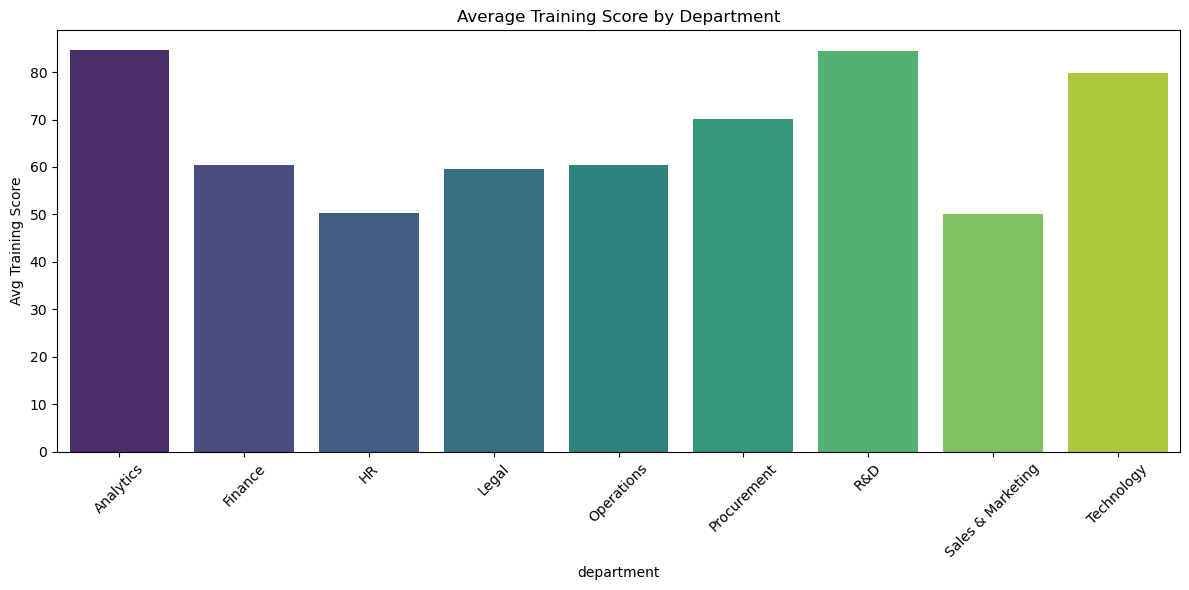

In [31]:
if __name__ == "__main__":
    main()

In [9]:
summary_stats = data.describe().transpose()
print(summary_stats)

                         count          mean           std   min      25%  \
employee_id            16646.0  39046.928932  22663.876934   3.0  19318.0   
no_of_trainings        16646.0      1.251352      0.597800   1.0      1.0   
age                    16646.0     34.805779      7.687745  20.0     29.0   
previous_year_rating   16054.0      3.345459      1.265386   1.0      3.0   
length_of_service      16646.0      5.804217      4.174023   1.0      3.0   
KPIs_met_more_than_80  16646.0      0.359125      0.479758   0.0      0.0   
awards_won             16646.0      0.023069      0.150126   0.0      0.0   
avg_training_score     16646.0     63.186712     13.413693  40.0     51.0   

                           50%       75%      max  
employee_id            38993.5  58714.25  78295.0  
no_of_trainings            1.0      1.00      9.0  
age                       33.0     39.00     60.0  
previous_year_rating       3.0      4.00      5.0  
length_of_service          5.0      7.00     3